In [95]:
import pandas as pd
import numpy as np 
import os
import matplotlib
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
from xgboost import XGBClassifier, plot_importance
import math

In [6]:
main_df = pd.read_csv(os.path.join('data', 'unpacked_genres.csv')).drop('Unnamed: 0', axis=1)

In [7]:
lang_df = pd.read_csv(os.path.join('data', 'languages_parsed.csv')).drop('Unnamed: 0', axis=1)

In [8]:
main_df.head()

,adult,budget,id,original_language,production_countries,revenue,runtime,spoken_languages,views,likes,...,Music,Adventure,Foreign,Action,TV Movie,Comedy,Documentary,War,Thriller,History
0,False,30000000,862,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",8050136,6330,...,0,0,0,0,0,1,0,0,0,0
1,False,65000000,8844,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",83048,70,...,0,1,0,0,0,0,0,0,0,0
2,False,16000000,31357,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",104948,0,...,0,0,0,0,0,1,0,0,0,0
3,False,60000000,949,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",32419,119,...,0,0,0,1,0,0,0,0,1,0
4,False,35000000,9091,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6162,12,...,0,1,0,1,0,0,0,0,1,0


In [10]:
lang_df.columns

Index([u'adult', u'budget', u'genres', u'id', u'production_countries',
       u'revenue', u'runtime', u'movieId', u'imdbId', u'tmdbId', u'views',
       u'likes', u'dislikes', u'n_trailers', u'numlang', u'cn', u'da', u'de',
       u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta',
       u'zh'],
      dtype='object')

In [12]:
main_df['id'] = main_df['id'].astype('str')
lang_df['id'] = lang_df['id'].astype('str')
lang_df = lang_df[['id', u'numlang', u'cn', u'da', u'de',
       u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta',
       u'zh']]

In [13]:
all_df = pd.merge(main_df, lang_df, on='id')

In [15]:
all_df.columns

Index([u'adult', u'budget', u'id', u'original_language',
       u'production_countries', u'revenue', u'runtime', u'spoken_languages',
       u'views', u'likes', u'dislikes', u'n_trailers', u'daysSinceStart',
       u'dayInYear', u'Mystery', u'Romance', u'Family', u'Science Fiction',
       u'Horror', u'Crime', u'Drama', u'Fantasy', u'Western', u'Animation',
       u'Music', u'Adventure', u'Foreign', u'Action', u'TV Movie', u'Comedy',
       u'Documentary', u'War', u'Thriller', u'History', u'numlang', u'cn',
       u'da', u'de', u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'],
      dtype='object')

In [16]:
all_df.to_csv(os.path.join('data', 'final.csv'))

In [17]:
all_df = all_df.drop(['production_countries', 'spoken_languages', 'original_language'], axis=1)

In [18]:
all_df.to_csv(os.path.join('data', 'final.csv'))

In [19]:
all_df.head()

,adult,budget,id,original_language,revenue,runtime,views,likes,dislikes,n_trailers,...,es,fr,hi,it,ja,ko,ml,ru,ta,zh
0,False,30000000,862,en,373554033.0,81.0,8050136,6330,1965,3,...,0,0,0,0,0,0,0,0,0,0
1,False,65000000,8844,en,262797249.0,104.0,83048,70,14,1,...,0,0,0,0,0,0,0,0,0,0
2,False,16000000,31357,en,81452156.0,127.0,104948,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,False,60000000,949,en,187436818.0,170.0,32419,119,1,1,...,0,0,0,0,0,0,0,0,0,0
4,False,35000000,9091,en,64350171.0,106.0,6162,12,3,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
all_df.drop('original_language', axis=1).to_csv(os.path.join('data', 'final.csv'))

In [59]:
df = pd.read_csv(os.path.join('data', 'final.csv'))

In [61]:
X = df.drop(['revenue', 'id', 'likes', 'dislikes'], axis=1)
y = df.revenue

In [62]:
reg = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
reg.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

103448983.253


In [60]:
print(reg.predict(df[df['id'] == 862].drop(['id', 'revenue'], axis=1)))

[2.0252707e+08]


In [64]:
X.columns

Index([u'budget', u'runtime', u'views', u'n_trailers', u'daysSinceStart',
       u'dayInYear', u'Mystery', u'Romance', u'Family', u'Science Fiction',
       u'Horror', u'Crime', u'Drama', u'Fantasy', u'Western', u'Animation',
       u'Music', u'Adventure', u'Foreign', u'Action', u'TV Movie', u'Comedy',
       u'Documentary', u'War', u'Thriller', u'History', u'numlang', u'cn',
       u'da', u'de', u'en', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'],
      dtype='object')

In [65]:
Xp = X.drop([u'cn',
       u'da', u'de', u'es', u'fr', u'hi', u'it', u'ja', u'ko', u'ml',
       u'ru', u'ta', u'zh'], axis=1)

In [66]:
Xp.head()

,budget,runtime,views,n_trailers,daysSinceStart,dayInYear,Mystery,Romance,Family,Science Fiction,...,Foreign,Action,TV Movie,Comedy,Documentary,War,Thriller,History,numlang,en
0,30000000,81.0,8050136,3,29484,302,0,0,1,0,...,0,0,0,1,0,0,0,0,1.0,1
1,65000000,104.0,83048,1,29530,348,0,0,1,0,...,0,0,0,0,0,0,0,0,2.0,1
2,16000000,127.0,104948,1,29537,355,0,1,0,0,...,0,0,0,1,0,0,0,0,1.0,1
3,60000000,170.0,32419,1,29530,348,0,0,0,0,...,0,1,0,0,0,0,1,0,2.0,1
4,35000000,106.0,6162,2,29537,355,0,0,0,0,...,0,1,0,0,0,0,1,0,1.0,1


In [67]:
reg = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
reg.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

101257670.095


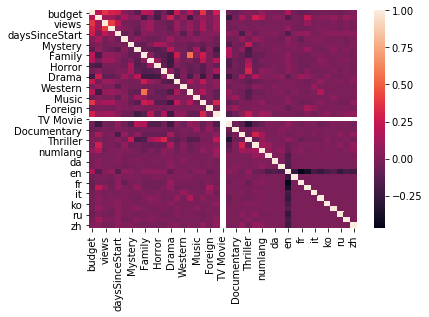

In [70]:
import seaborn as sns
sns.heatmap(X.corr())

In [72]:
df.columns

Index([u'budget', u'id', u'revenue', u'runtime', u'views', u'likes',
       u'dislikes', u'n_trailers', u'daysSinceStart', u'dayInYear', u'Mystery',
       u'Romance', u'Family', u'Science Fiction', u'Horror', u'Crime',
       u'Drama', u'Fantasy', u'Western', u'Animation', u'Music', u'Adventure',
       u'Foreign', u'Action', u'TV Movie', u'Comedy', u'Documentary', u'War',
       u'Thriller', u'History', u'numlang', u'cn', u'da', u'de', u'en', u'es',
       u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh'],
      dtype='object')

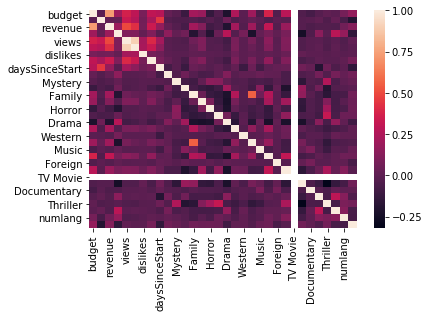

In [74]:
sns.heatmap(df.drop([u'cn', u'da', u'de', u'es',
       u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh'], axis=1).corr())

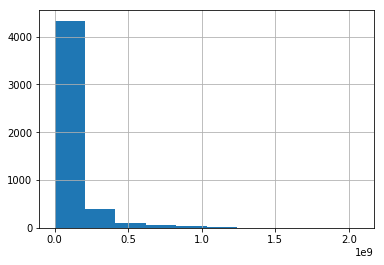

In [75]:
df.revenue.hist()

In [77]:
profit = []
for i in range(len(df)):
    profit.append(df['revenue'][i] - df['budget'][i])

In [79]:
df['profit'] = profit

In [80]:
len(df[df['profit'] < 0])

1415

In [83]:
isProfitable = []
for i in range(len(df)):
    isProfitable.append(df['profit'][i] > 0)
df['isProfitable'] = isProfitable

In [87]:
df.columns

Index([u'budget', u'id', u'revenue', u'runtime', u'views', u'likes',
       u'dislikes', u'n_trailers', u'daysSinceStart', u'dayInYear', u'Mystery',
       u'Romance', u'Family', u'Science Fiction', u'Horror', u'Crime',
       u'Drama', u'Fantasy', u'Western', u'Animation', u'Music', u'Adventure',
       u'Foreign', u'Action', u'TV Movie', u'Comedy', u'Documentary', u'War',
       u'Thriller', u'History', u'numlang', u'cn', u'da', u'de', u'en', u'es',
       u'fr', u'hi', u'it', u'ja', u'ko', u'ml', u'ru', u'ta', u'zh',
       u'profit', u'isProfitable'],
      dtype='object')

In [104]:
X = df.drop(['id', 'revenue', 'TV Movie', 'profit', 'isProfitable'], axis=1)
y = df.isProfitable.astype('int')

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = XGBClassifier()

In [129]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7381144238517324

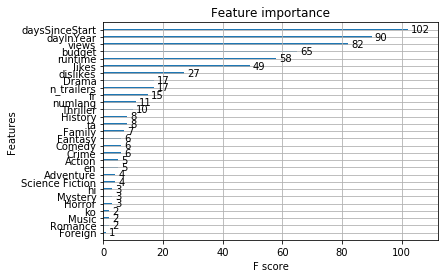

In [107]:
plot_importance(clf)
plt.show()

In [115]:
roc_auc_score(y_test, np.array(clf.predict_proba(X_test))[:,1])

0.7659765263571492

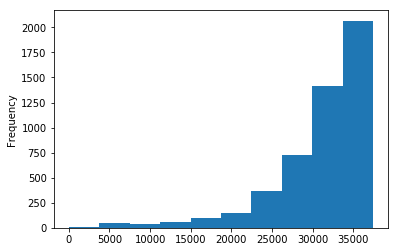

In [116]:
df.daysSinceStart.plot.hist()

In [120]:
df['isProfitable'] = df['isProfitable'].astype('int')

In [122]:
len(df[df['isProfitable'] == 0])

1421

In [123]:
1421.0/(len(df)-1421.0)

0.4012990680598701

In [130]:
df.to_csv(os.path.join('data', 'final_clf.csv'))